In [42]:
#Import necessary Libraries
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, RobustScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix


In [43]:
df = pd.read_csv('creditcard.csv')

In [44]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


+ Since columns are more than the default numbers that pandas show, we will use max display to have better look at all columns

In [45]:
pd.set_option('display.max_columns',None)

In [46]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [47]:
df.select_dtypes(exclude=['float','int'])

""
0
1
2
3
4
...
284802
284803
284804
284805


+ All the columns are numerical already.

In [48]:
df.isnull().values.any()

False

In [49]:
df.duplicated().sum()

1081

In [50]:
df.drop_duplicates()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


+ Remove duplicates else model will give those more value and would create bias

In [51]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<Axes: >

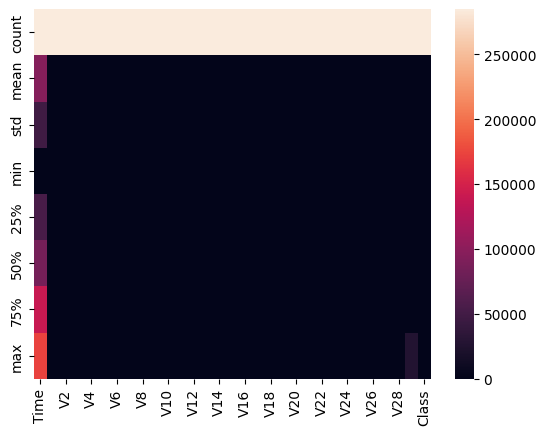

In [52]:
sns.heatmap(df.describe())

+ Amount and Time columns are not scaled.

In [53]:
df['Amount'].value_counts()

Amount
1.00       13688
1.98        6044
0.89        4872
9.99        4747
15.00       3280
           ...  
62.09          1
552.05         1
1467.75        1
196.68         1
95.63          1
Name: count, Length: 32767, dtype: int64

In [54]:
df['Amount'].max()

25691.16

<Axes: >

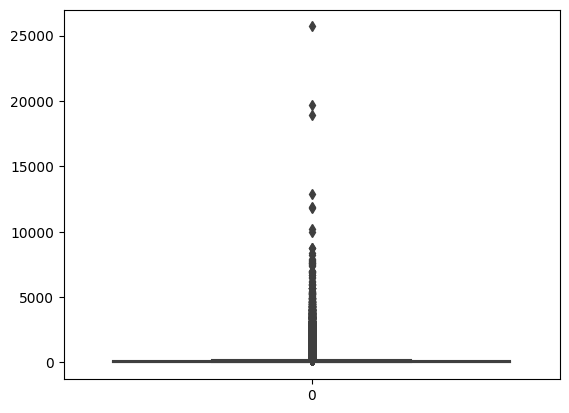

In [55]:
sns.boxplot(df['Amount'])

+ Seems to have lots of outliers but not everyone have normally distributed amount they use for transactions so we will leave it as it is.

In [56]:
df[(df['Amount']) == 0]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
383,282.0,-0.356466,0.725418,1.971749,0.831343,0.369681,-0.107776,0.751610,-0.120166,-0.420675,-0.059943,-0.508270,0.425506,0.414309,-0.698375,-1.465349,-0.119009,-0.144735,-1.332221,-1.547440,-0.133602,0.020804,0.424312,-0.015989,0.466754,-0.809962,0.657334,-0.043150,-0.046401,0.0,0
514,380.0,-1.299837,0.881817,1.452842,-1.293698,-0.025105,-1.170103,0.861610,-0.193934,0.592001,0.241979,0.144973,-0.583891,-1.595345,0.032613,0.752834,-0.094286,-0.163427,-1.111176,-1.124025,0.065979,-0.272563,-0.360853,0.223911,0.598930,-0.397705,0.637141,0.234872,0.021379,0.0,0
534,403.0,1.237413,0.512365,0.687746,1.693872,-0.236323,-0.650232,0.118066,-0.230545,-0.808523,0.511284,-0.178159,0.762909,1.700923,-0.133861,0.402418,0.684668,-0.609395,-0.704277,-0.720726,-0.006716,-0.077543,-0.178220,0.038722,0.471218,0.289249,0.871803,-0.066884,0.012986,0.0,0
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.0,1
575,430.0,-1.860258,-0.629859,0.966570,0.844632,0.759983,-1.481173,-0.509681,0.540722,-0.733623,-0.371622,0.859741,0.372609,-1.240185,0.998391,-0.346387,-0.391679,0.348289,0.282125,1.165893,0.320450,0.268028,0.125515,-0.225029,0.586664,-0.031598,0.570168,-0.043007,-0.223739,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283719,171817.0,-0.750414,0.904175,0.996461,0.427284,1.720336,0.929256,0.794272,0.176719,-1.836261,0.233928,-0.569993,0.110682,0.784652,-0.261719,-2.370735,0.943657,-0.923311,-0.107890,0.044242,0.116340,0.050750,0.115532,-0.623995,-0.186896,0.733759,2.558151,-0.188835,0.001654,0.0,0
283782,171870.0,2.083677,-0.065811,-1.442870,0.135416,0.043035,-1.306975,0.335835,-0.371635,0.730560,-0.106473,-0.820816,0.268172,-0.431765,0.508677,0.186750,-0.518524,-0.147862,-0.728870,0.234239,-0.278137,-0.147536,-0.246599,0.194758,-0.082277,0.012887,-0.069278,-0.048995,-0.065482,0.0,0
283949,172027.0,2.132569,-0.057836,-1.724522,-0.030326,0.412146,-0.903088,0.345843,-0.348132,0.722638,-0.116179,-1.376166,0.234341,0.054018,0.394647,0.197209,-0.334269,-0.419726,-0.548358,0.492017,-0.232386,-0.188739,-0.343876,0.105024,-0.763831,0.117381,-0.027682,-0.047514,-0.071700,0.0,0
284085,172140.0,-2.210521,-1.039425,0.189704,-1.291932,3.742120,-1.665061,3.120388,-2.324089,0.364926,1.582486,1.099928,0.015128,0.071182,-1.056637,-1.611600,-0.609454,-1.876089,-0.411326,-0.556234,-0.818118,-0.286359,1.326003,-0.361764,-0.268117,1.051309,0.334629,-1.930149,-0.899888,0.0,0


+ Transaction amount can't be zero

In [57]:
df = df[(df['Amount']) != 0]

In [58]:
df['Time'].value_counts()

Time
163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
62122.0      1
62121.0      1
62119.0      1
127650.0     1
172792.0     1
Name: count, Length: 124278, dtype: int64

In [59]:
df['Class'].value_counts(normalize=True)

Class
0    0.998357
1    0.001643
Name: proportion, dtype: float64

+ Data is highly imbalance

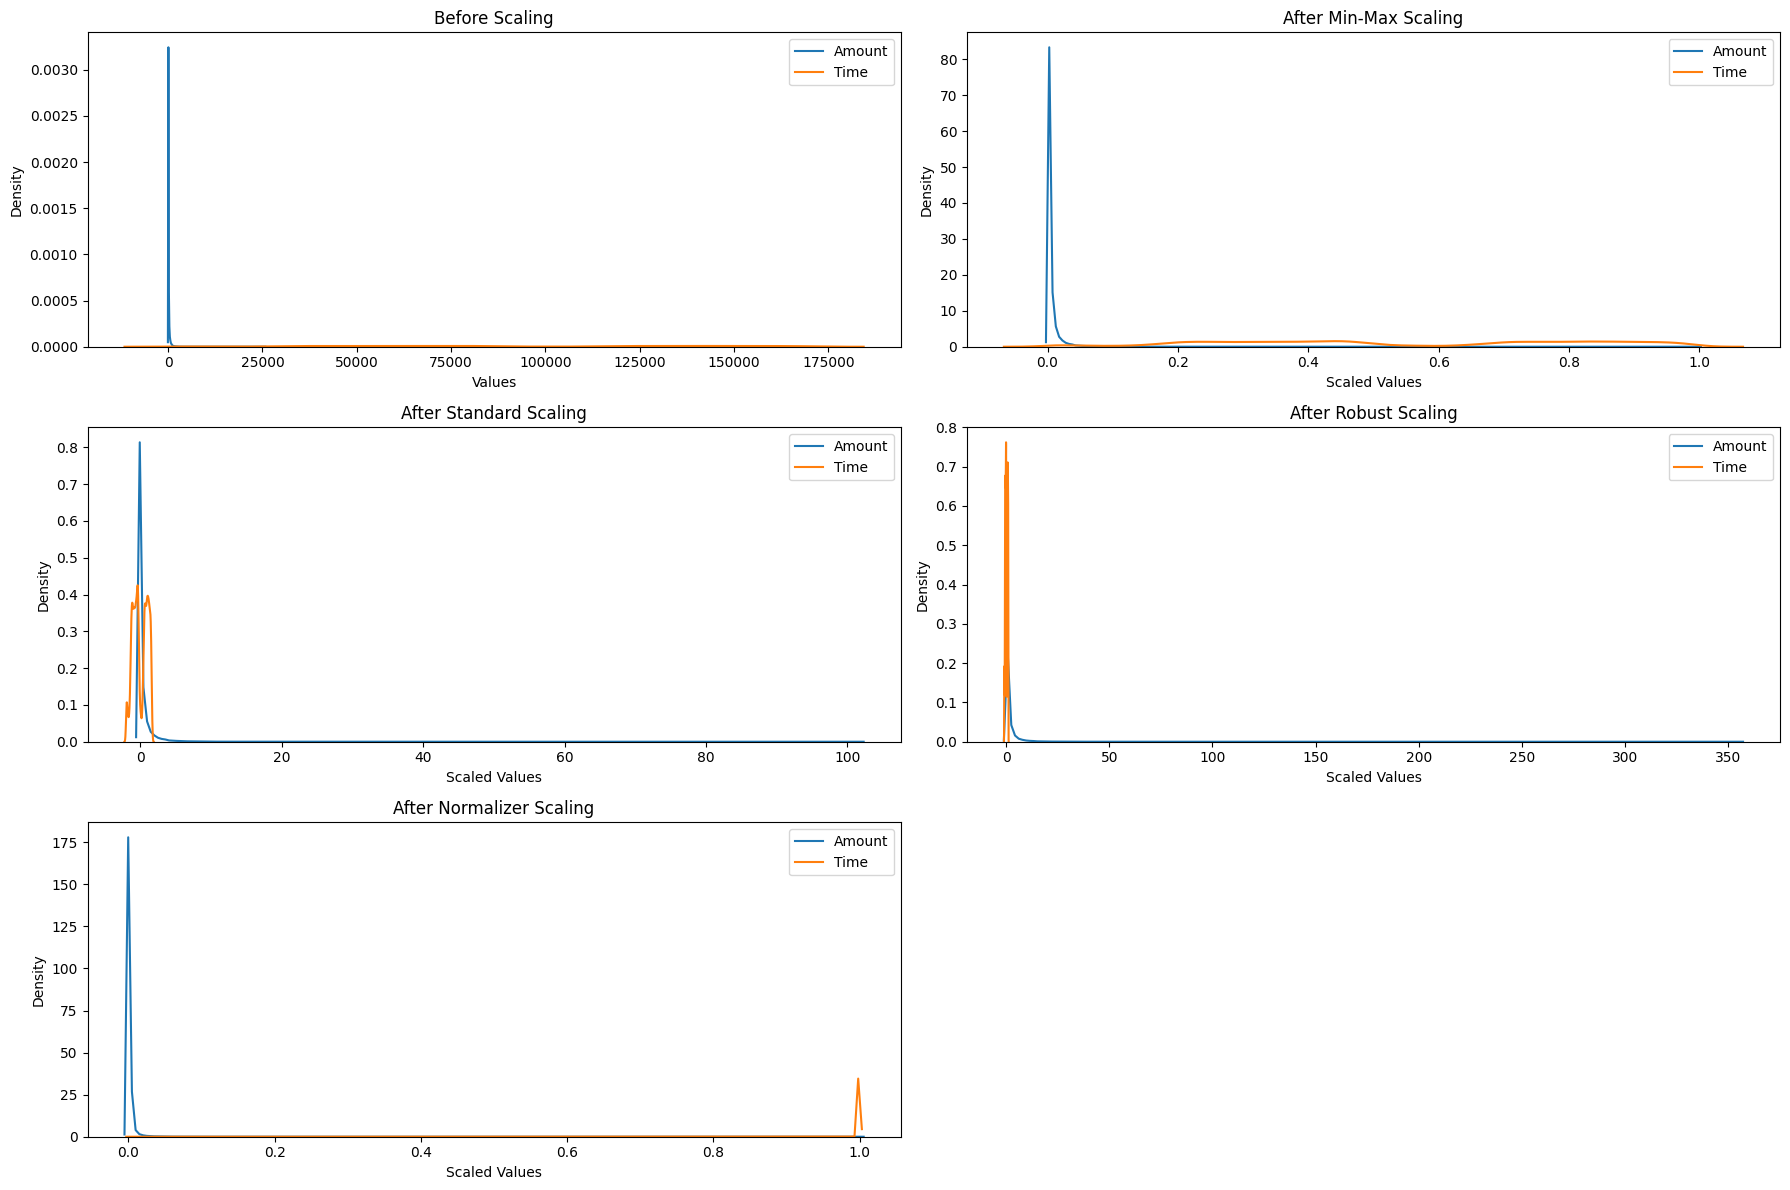

In [60]:
columns_to_plot = ['Amount', 'Time']

# Before scaling
plt.figure(figsize=(18, 12))

plt.subplot(3, 2, 1)
for col in columns_to_plot:
    sns.kdeplot(df[col], label=col)
plt.title('Before Scaling')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()

# Min-Max Scaling
scaler_minmax = MinMaxScaler()
df_scaled_minmax = pd.DataFrame(scaler_minmax.fit_transform(df[columns_to_plot]), columns=columns_to_plot)

plt.subplot(3, 2, 2)
for col in columns_to_plot:
    sns.kdeplot(df_scaled_minmax[col], label=col)
plt.title('After Min-Max Scaling')
plt.xlabel('Scaled Values')
plt.ylabel('Density')
plt.legend()

# Standard Scaling
scaler_standard = StandardScaler()
df_scaled_standard = pd.DataFrame(scaler_standard.fit_transform(df[columns_to_plot]), columns=columns_to_plot)

plt.subplot(3, 2, 3)
for col in columns_to_plot:
    sns.kdeplot(df_scaled_standard[col], label=col)
plt.title('After Standard Scaling')
plt.xlabel('Scaled Values')
plt.ylabel('Density')
plt.legend()

# Robust Scaling
scaler_robust = RobustScaler()
df_scaled_robust = pd.DataFrame(scaler_robust.fit_transform(df[columns_to_plot]), columns=columns_to_plot)

plt.subplot(3, 2, 4)
for col in columns_to_plot:
    sns.kdeplot(df_scaled_robust[col], label=col)
plt.title('After Robust Scaling')
plt.xlabel('Scaled Values')
plt.ylabel('Density')
plt.legend()

# Normalize Scaling (this is row-wise normalization)
scaler_norm = Normalizer()
df_scaled_norm = pd.DataFrame(scaler_norm.fit_transform(df[columns_to_plot]), columns=columns_to_plot)

plt.subplot(3, 2, 5)
for col in columns_to_plot:
    sns.kdeplot(df_scaled_norm[col], label=col)
plt.title('After Normalizer Scaling')
plt.xlabel('Scaled Values')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()


+ Min-Max Scaling and Robust Scaling shows same pattern our original dataset shows, but since Amount column is full of outliers we will use Robust Scaling

In [61]:
columns_to_scale = ['Amount', 'Time']

scaler = RobustScaler()

df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.995242,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.765449,0
1,-0.995242,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.274962,0
2,-0.995230,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.946119,0
3,-0.995230,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.402722,0
4,-0.995218,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.659631,0


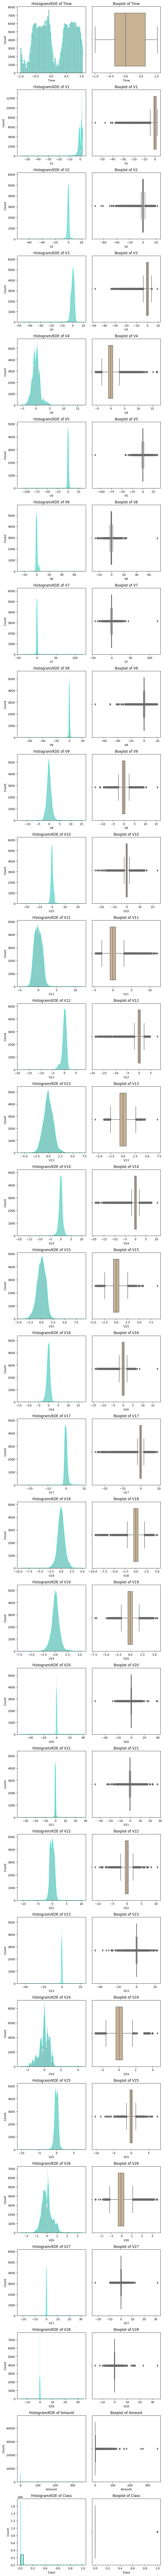

In [62]:
colors = ['#40E0D0', '#D2B48C']

fig, axes = plt.subplots(nrows=31, ncols=2, figsize=(8, 4 * 31))

axes = axes.flatten()

for idx, col in enumerate(df.columns):
    sns.histplot(df[col], kde=True, ax=axes[2 * idx], color=colors[0])
    axes[2 * idx].set_title(f'Histogram/KDE of {col}')
    axes[2 * idx].set_xlabel(col)
    
    sns.boxplot(x=df[col], ax=axes[2 * idx + 1], color=colors[1])
    axes[2 * idx + 1].set_title(f'Boxplot of {col}')
    axes[2 * idx + 1].set_xlabel(col)

plt.tight_layout()
plt.show()


+ Most of the columns seems to have normal distribution, less dispersion with lots of outliers, since our dataset doesn't have proper names of colums we won't do anything for it.
+  Since our dataset is highly imbalance we will use different sampling techniques to make our model work.

In [63]:
X = df.drop('Class',axis=1)
y = df["Class"]

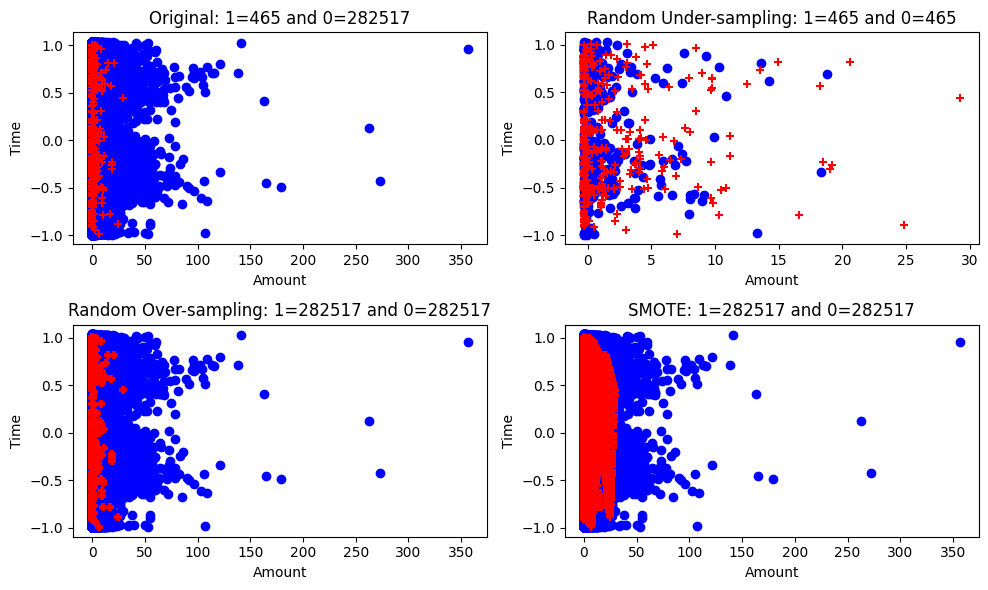

In [64]:
#Apply different Sampling techniques

rus = RandomUnderSampler()
X_RUS, y_RUS = rus.fit_resample(X, y)

ros = RandomOverSampler()
X_ROS, y_ROS = ros.fit_resample(X, y)

sm = SMOTE()
X_SMOTE, y_SMOTE = sm.fit_resample(X, y)

# Original vs resampled subplots
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.scatter(X[y == 0]['Amount'], X[y == 0]['Time'], marker='o', color='blue')  # Corrected indexing
plt.scatter(X[y == 1]['Amount'], X[y == 1]['Time'], marker='+', color='red')
plt.xlabel('Amount')
plt.ylabel('Time')
plt.title(f'Original: 1={y.tolist().count(1)} and 0={y.tolist().count(0)}')

# Random Under-sampling plot
plt.subplot(2, 2, 2)
plt.scatter(X_RUS[y_RUS == 0]['Amount'], X_RUS[y_RUS == 0]['Time'], marker='o', color='blue')  # Corrected indexing
plt.scatter(X_RUS[y_RUS == 1]['Amount'], X_RUS[y_RUS == 1]['Time'], marker='+', color='red')
plt.xlabel('Amount')
plt.ylabel('Time')
plt.title(f'Random Under-sampling: 1={y_RUS.tolist().count(1)} and 0={y_RUS.tolist().count(0)}')

# Random Over-sampling plot
plt.subplot(2, 2, 3)
plt.scatter(X_ROS[y_ROS == 0]['Amount'], X_ROS[y_ROS == 0]['Time'], marker='o', color='blue')  # Corrected indexing
plt.scatter(X_ROS[y_ROS == 1]['Amount'], X_ROS[y_ROS == 1]['Time'], marker='+', color='red')
plt.xlabel('Amount')
plt.ylabel('Time')
plt.title(f'Random Over-sampling: 1={y_ROS.tolist().count(1)} and 0={y_ROS.tolist().count(0)}')

# SMOTE plot
plt.subplot(2, 2, 4)
plt.scatter(X_SMOTE[y_SMOTE == 0]['Amount'], X_SMOTE[y_SMOTE == 0]['Time'], marker='o', color='blue')  # Corrected indexing
plt.scatter(X_SMOTE[y_SMOTE == 1]['Amount'], X_SMOTE[y_SMOTE == 1]['Time'], marker='+', color='red')
plt.xlabel('Amount')
plt.ylabel('Time')
plt.title(f'SMOTE: 1={y_SMOTE.tolist().count(1)} and 0={y_SMOTE.tolist().count(0)}')

plt.tight_layout()
plt.show()

+  Random Under Sampling and SMOTE seems to work better than Random Over sampling.
+  Random Under Sampling seems to delete most of our data, but new data spoints seems to have proper balanced data
+  SMOTE seems to create new data points that are similar to the existing data points, but it's better than Random Over sampling that kinda just copy pasted data points.

In [65]:
X_RUS

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
138721,-0.022306,1.103198,-0.516509,1.043418,0.702689,-1.292794,-0.381240,-0.631045,-0.004531,-0.856200,0.759839,0.062212,0.244423,0.511320,-0.004764,1.265195,-1.497258,0.104919,0.903189,-1.967494,-0.435087,-0.140908,0.002740,0.050943,0.570334,0.227712,-0.309811,0.076024,0.051107,0.687543
72563,-0.351858,1.078216,-0.321517,1.306164,0.757476,-1.031229,0.346446,-0.859691,0.394823,0.789178,-0.089743,1.217545,0.806068,-0.992292,0.008996,-0.165945,0.048969,-0.020848,-0.146447,-0.180738,-0.183671,-0.008614,0.121311,0.083134,0.235500,0.093255,0.319503,0.023857,0.013940,-0.174142
82621,-0.296425,-0.252458,1.098006,0.716040,-0.265044,0.753229,-0.190672,0.682152,0.004068,-0.335212,-0.514005,-1.420614,-0.405718,0.614479,-0.562610,0.969175,0.778160,-0.514248,0.287085,0.435239,0.176731,-0.352289,-0.927352,-0.190841,-1.061134,0.034877,0.157893,0.245316,0.084888,-0.287460
32688,-0.561451,0.955616,-0.158743,-0.267951,0.461265,-0.021920,-0.692892,0.620333,-0.263228,-0.602557,0.017878,1.350371,1.343786,0.926995,0.531928,-0.019465,0.264415,-0.653800,-0.353399,0.462862,0.303751,-0.222842,-1.029401,-0.080953,0.028801,0.310332,0.151315,-0.095123,0.024527,2.020136
987,-0.986488,1.199499,0.258133,0.397414,0.631901,-0.477200,-0.882180,-0.061831,-0.028327,-0.131014,-0.092530,1.690372,0.604147,-0.621228,0.065803,0.458311,0.649708,-0.140624,0.218950,0.019586,-0.123836,-0.231200,-0.739287,0.151192,0.475510,0.134455,0.066839,-0.031282,0.021059,-0.294404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,0.992034,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,5.103597
280143,0.994443,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.301764
280149,0.994490,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,0.769338
281144,1.001715,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,3.089988


In [66]:
y_RUS

138721    0
72563     0
82621     0
32688     0
987       0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 930, dtype: int64

+ Its better to check dataset one more time before applying our machine learning model to fit our data

In [67]:
# Check if y_RUS is 2D and flatten it if necessary
if len(y_RUS.shape) > 1:
    y_RUS = y_RUS.ravel()

X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_RUS, y_RUS, test_size=0.20, random_state=42)


In [68]:
log_rus = LogisticRegression()
log_rus.fit(X_train_rus, y_train_rus)

LogisticRegression()

[[88  1]
 [10 87]]


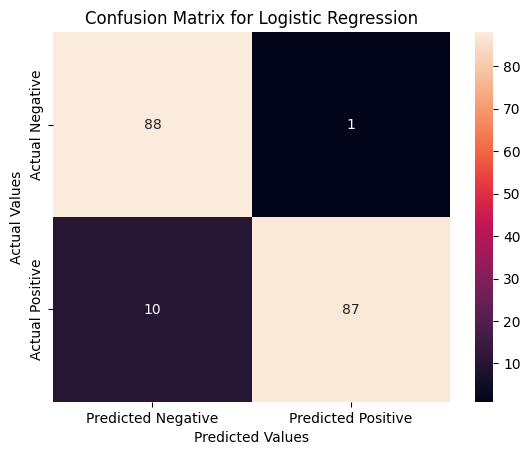

In [69]:
pred_rus = log_rus.predict(X_test_rus)

confusion_rus = confusion_matrix(y_test_rus, pred_rus)
print(confusion_rus)
sns.heatmap(confusion_rus, annot=True, fmt="d",
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [70]:
classification_rus = classification_report(y_test_rus, pred_rus)
print("Classification Report:\n", classification_rus)

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94        89
           1       0.99      0.90      0.94        97

    accuracy                           0.94       186
   macro avg       0.94      0.94      0.94       186
weighted avg       0.95      0.94      0.94       186



+ Model seemed to work good but most our dataset is lost, only 186 datapoints are used here using Random Under Sampling

In [71]:
# Ensure y_SMOTE is 1D
if len(y_SMOTE.shape) > 1:
    y_SMOTE = y_SMOTE.ravel()

X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_SMOTE, y_SMOTE, test_size=0.20, random_state=42)



In [72]:
log_smote = LogisticRegression()
log_smote.fit(X_train_smote, y_train_smote)

LogisticRegression()

[[55092  1320]
 [ 4532 52063]]


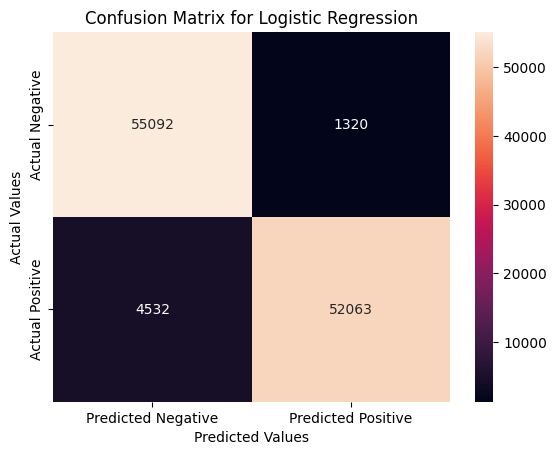

In [73]:
pred_smote = log_smote.predict(X_test_smote)

confusion_smote = confusion_matrix(y_test_smote, pred_smote)
print(confusion_smote)
sns.heatmap(confusion_smote, annot=True, fmt="d",
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [74]:
classification_smote = classification_report(y_test_smote, pred_smote)
print("Classification Report:\n", classification_smote)

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     56412
           1       0.98      0.92      0.95     56595

    accuracy                           0.95    113007
   macro avg       0.95      0.95      0.95    113007
weighted avg       0.95      0.95      0.95    113007



+ SMOTE scaling created a good model which have good number of diagonal means its prediction is good.

In [83]:
rf_rus = RandomForestClassifier()
rf_rus.fit(X_train_rus, y_train_rus)

RandomForestClassifier()

[[88  1]
 [11 86]]


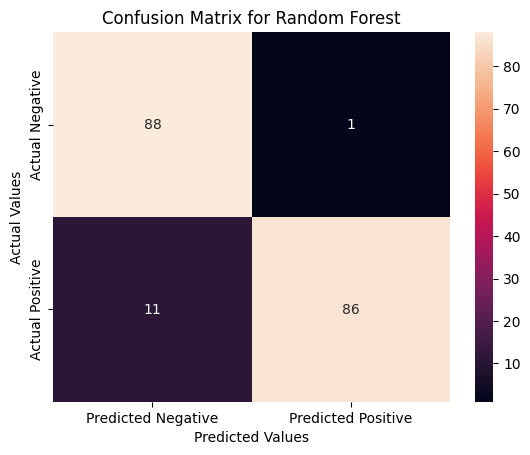

In [84]:
pred_rus = rf_rus.predict(X_test_rus)

confusion_rus = confusion_matrix(y_test_rus, pred_rus)
print(confusion_rus)
sns.heatmap(confusion_rus, annot=True, fmt="d",
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [85]:
classification_rus = classification_report(y_test_rus, pred_rus)
print("Classification Report:\n", classification_rus)

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94        89
           1       0.99      0.89      0.93        97

    accuracy                           0.94       186
   macro avg       0.94      0.94      0.94       186
weighted avg       0.94      0.94      0.94       186



+ Result is almost similar to the Logistics Regression Model

In [86]:
rf_smote = RandomForestClassifier()
rf_smote.fit(X_train_smote, y_train_smote)

RandomForestClassifier()

[[56403     9]
 [    0 56595]]


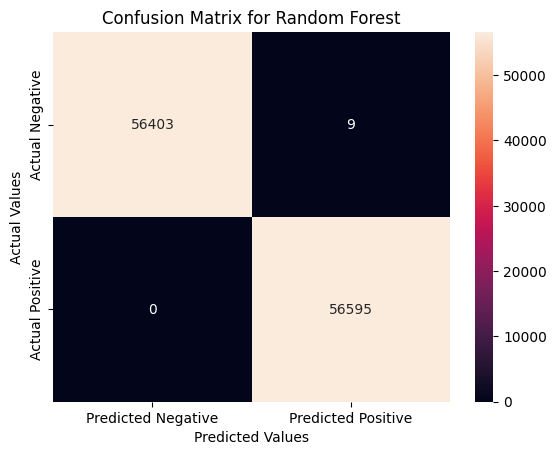

In [87]:
pred_smote = rf_smote.predict(X_test_smote)

confusion_smote = confusion_matrix(y_test_smote, pred_smote)
print(confusion_smote)
sns.heatmap(confusion_smote, annot=True, fmt="d",
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [80]:
classification_smote = classification_report(y_test_smote, pred_smote)
print("Classification Report:\n", classification_smote)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56412
           1       1.00      1.00      1.00     56595

    accuracy                           1.00    113007
   macro avg       1.00      1.00      1.00    113007
weighted avg       1.00      1.00      1.00    113007



+ Random Forest did well compare to the logistic regression model

In [81]:
#Classification report prediction for finding out best performance model and scaling technique
pred_log_rus = log_rus.predict(X_test_rus)
pred_log_smote = log_smote.predict(X_test_smote)
pred_rf_rus = rf_rus.predict(X_test_rus)
pred_rf_smote = rf_smote.predict(X_test_smote)

report_log_rus = classification_report(y_test_rus, pred_log_rus, output_dict=True)
report_log_smote = classification_report(y_test_smote, pred_log_smote, output_dict=True)
report_rf_rus = classification_report(y_test_rus, pred_rf_rus, output_dict=True)
report_rf_smote = classification_report(y_test_smote, pred_rf_smote, output_dict=True)

In [82]:
# Combine reports into a single dictionary
combined_report = {
    'Log Rus': report_log_rus,
    'Log Smote': report_log_smote,
    'RF Rus': report_rf_rus,
    'RF Smote': report_rf_smote
}

# Create a new dictionary for the DataFrame
df_dict = {
    'Classifier': [],
    'Class': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'Accuracy': [] 
}

# Populate the DataFrame dictionary
for classifier, report in combined_report.items():
    accuracy = report['accuracy'] 
    for class_label, metrics in report.items():
        if isinstance(metrics, dict):
            df_dict['Classifier'].append(classifier)
            df_dict['Class'].append(class_label)
            df_dict['Precision'].append(metrics['precision'])
            df_dict['Recall'].append(metrics['recall'])
            df_dict['F1-Score'].append(metrics['f1-score'])
            df_dict['Accuracy'].append(accuracy)

df_report = pd.DataFrame(df_dict)

df_report.head(16)


,Classifier,Class,Precision,Recall,F1-Score,Accuracy
0,Log Rus,0,0.897959,0.988764,0.941176,0.940860
1,Log Rus,1,0.988636,0.896907,0.940541,0.940860
2,Log Rus,macro avg,0.943298,0.942836,0.940859,0.940860
3,Log Rus,weighted avg,0.945248,0.940860,0.940845,0.940860
4,Log Smote,0,0.923990,0.976601,0.949567,0.948216
5,Log Smote,1,0.975273,0.919922,0.946789,0.948216
6,Log Smote,macro avg,0.949632,0.948261,0.948178,0.948216
7,Log Smote,weighted avg,0.949673,0.948216,0.948176,0.948216
8,RF Rus,0,0.897959,0.988764,0.941176,0.940860
9,RF Rus,1,0.988636,0.896907,0.940541,0.940860


+ Random Forest with SMOTE scaling did well on our dataset though it was highly imbalance.
+ Random Forest showed precision of 100% for majority class and precision of 99% for minority class using SMOTE
+ Random Forest showed recall of 99% for majority class and precision of 100% for minority class using SMOTE
+ F1 score which is the harmonic mean showed 99% accuracy